# Análisis descriptivo de los casos de dengue en Argentina en las semanas epidemiológicas de 2018 y 2019

#### Librerías usadas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

#### Datos utilizados

###### Datos Julio 2018

In [ ]:
df=pd.read_csv('http://datos.salud.gob.ar/dataset/ceaa8e87-297e-4348-84b8-5c643e172500/resource/255440b0-d8b2-4247-87d2-91dfec29eb0f/download/informacion-publica-dengue-zika-nacional-hasta-20181231.csv',
               sep=',',encoding='utf-8')
df = df[df.evento_nombre != 'Enfermedad por Virus del Zika'] # se borraron las filas con los datos del zika para centrarme en el dengue
df.head(5)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,ano,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
0,2003,COMUNA 3,2,CABA,2018,15,Dengue,6,de 10 a 14 anos,1
1,2004,COMUNA 4,2,CABA,2018,6,Dengue,6,de 10 a 14 anos,1
2,6091,Berazategui,6,Buenos Aires,2018,11,Dengue,7,de 15 a 24 anos,1
3,6091,Berazategui,6,Buenos Aires,2018,14,Dengue,9,de 25 a 34 anos,2
4,6091,Berazategui,6,Buenos Aires,2018,19,Dengue,11,de 45 a 65 anos,1


###### Datos Julio 2019

In [ ]:
df5=pd.read_excel('http://datos.salud.gob.ar/dataset/ceaa8e87-297e-4348-84b8-5c643e172500/resource/ab93dc4b-4e6c-499b-9335-c548a701a870/download/informacion-publica-dengue-zika-nacional-hasta-20191231_3.xlsx',
            )
df5 = df5.drop(range(0,679), axis=0) # se borró ese rango de filas porque contienen casos del 2018
df5 = df5[df5.evento_nombre != 'Enfermedad por Virus del Zika'] # se borraron las filas con los datos del zika para centrarme en el dengue
df5.head(5)

,departamento_id,departamento_nombre,provincia_id,provincia_nombre,año,semanas_epidemiologicas,evento_nombre,grupo_edad_id,grupo_edad_desc,cantidad_casos
679,66049,General Guemes,66,Salta,2019,8,Dengue,6.0,De 15 a 19 anos,1
680,66049,General Guemes,66,Salta,2019,2,Dengue,7.0,De 20 a 24 anos,1
681,66049,General Guemes,66,Salta,2019,5,Dengue,7.0,De 20 a 24 anos,1
682,66049,General Guemes,66,Salta,2019,23,Dengue,8.0,De 25 a 34 anos,1
683,66049,General Guemes,66,Salta,2019,6,Dengue,9.0,De 35 a 44 anos,1


#### Gráficos

###### Casos agrupados por semanas epidemiológicas

Text(0, 0.5, 'Cantidad de casos')

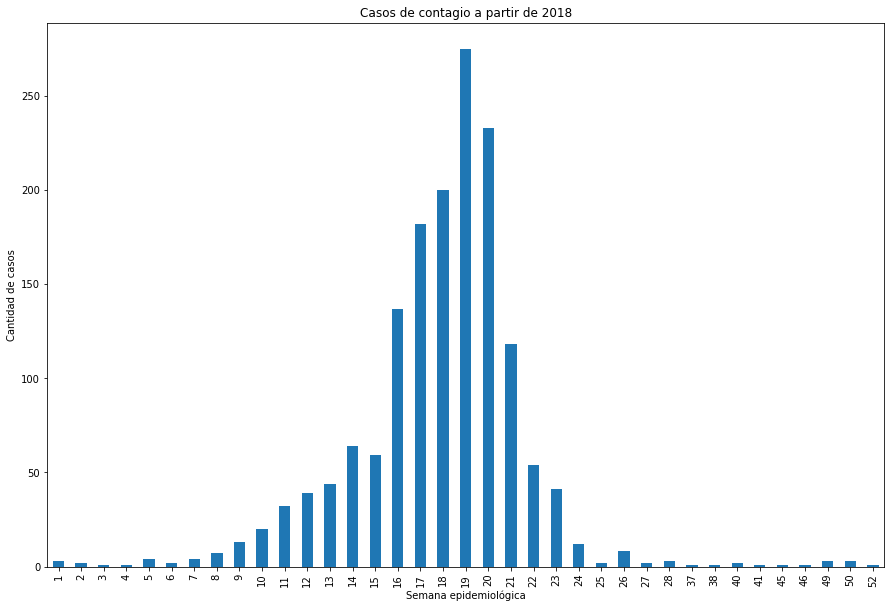

In [ ]:
ax = df['cantidad_casos'].groupby(df['semanas_epidemiologicas']).sum().plot(kind='bar', figsize=(15,10) , title='Casos de contagio a partir de 2018')
ax.set_xlabel('Semana epidemiológica')
ax.set_ylabel('Cantidad de casos')

Text(0, 0.5, 'Cantidad de casos')

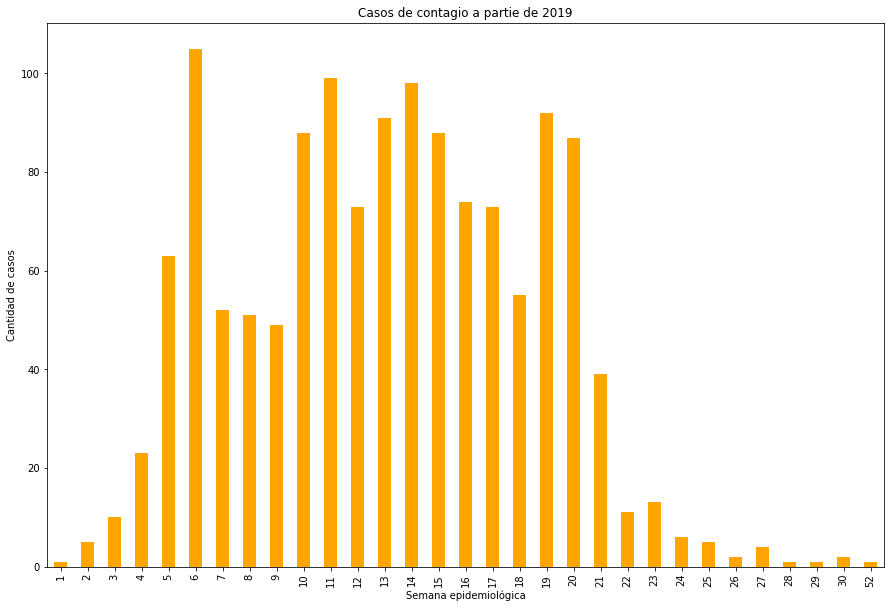

In [ ]:
ax = df5['cantidad_casos'].groupby(df5['semanas_epidemiologicas']).sum().plot(kind='bar',color= 'orange', figsize=(15,10) , title='Casos de contagio a partie de 2019')
ax.set_xlabel('Semana epidemiológica')
ax.set_ylabel('Cantidad de casos')

Text(0, 0.5, 'Cantidad de casos')

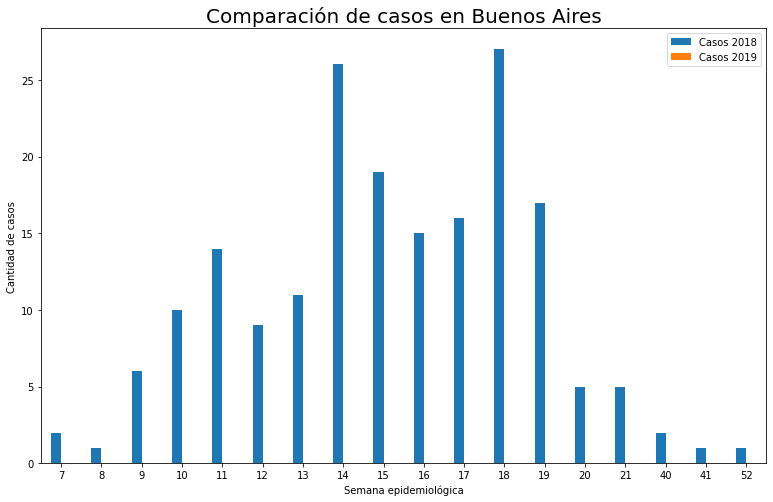

In [ ]:
df13 = df[df['provincia_nombre']=='Buenos Aires']
ax1 = df13['cantidad_casos'].groupby(df13['semanas_epidemiologicas']).sum()

df13 = df5[df5['provincia_nombre']=='Buenos Aires']
ax2 = df13['cantidad_casos'].groupby(df13['semanas_epidemiologicas']).sum()

df10 = pd.DataFrame({'Casos 2018': ax1,
                     'Casos 2019': ax2})
ax = df10.plot.bar(rot=0,figsize=(13,8) ,title='Comparación de casos en Buenos Aires')
ax.title.set_size(20)
plt.rcParams.update({'font.size': 18})
ax.set_xlabel('Semana epidemiológica')
ax.set_ylabel('Cantidad de casos')

Text(0, 0.5, 'Cantidad de casos')

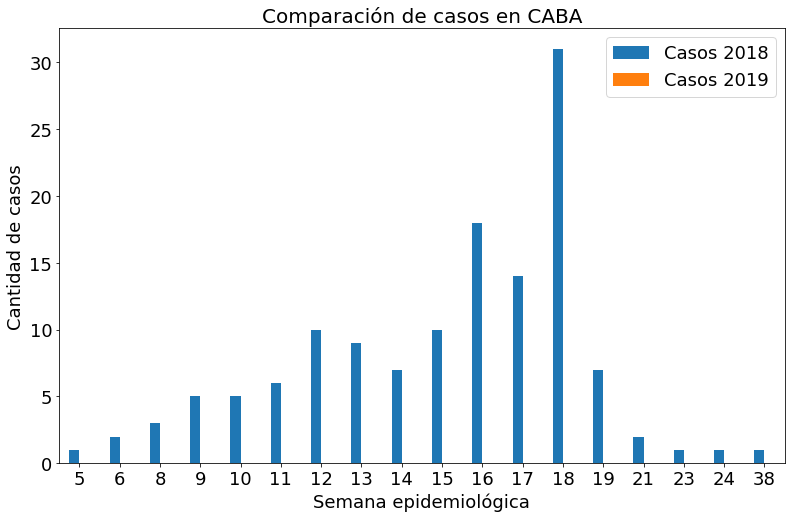

In [ ]:
df13 = df[df['provincia_nombre']=='CABA']
ax1 = df13['cantidad_casos'].groupby(df13['semanas_epidemiologicas']).sum()

df13 = df5[df5['provincia_nombre']=='CABA']
ax2 = df13['cantidad_casos'].groupby(df13['semanas_epidemiologicas']).sum()

df10 = pd.DataFrame({'Casos 2018': ax1,
                     'Casos 2019': ax2})
ax = df10.plot.bar(rot=0,figsize=(13,8) ,title='Comparación de casos en CABA')
ax.title.set_size(20)
plt.rcParams.update({'font.size': 18})
ax.set_xlabel('Semana epidemiológica')
ax.set_ylabel('Cantidad de casos')

Text(0, 0.5, 'Cantidad de casos')

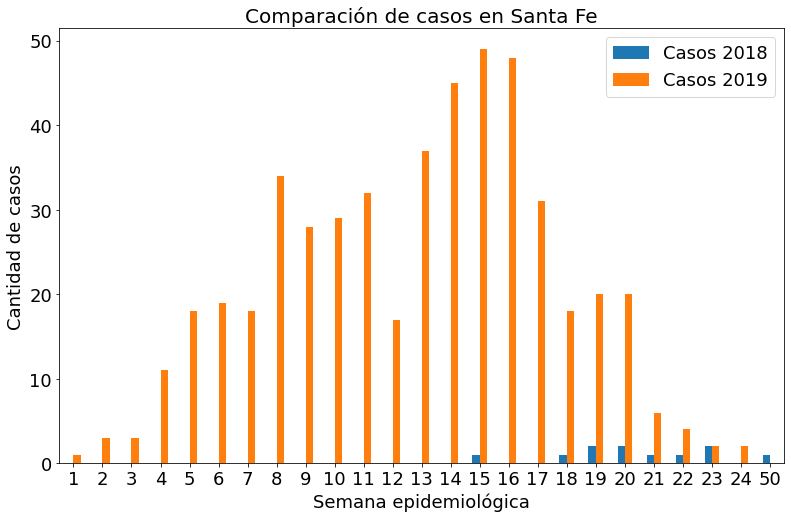

In [ ]:
df13 = df[df['provincia_nombre']=='Santa Fe']
ax1 = df13['cantidad_casos'].groupby(df13['semanas_epidemiologicas']).sum()

df13 = df5[df5['provincia_nombre']=='Santa Fe']
ax2 = df13['cantidad_casos'].groupby(df13['semanas_epidemiologicas']).sum()

df10 = pd.DataFrame({'Casos 2018': ax1,
                     'Casos 2019': ax2})
ax = df10.plot.bar(rot=0,figsize=(13,8) ,title='Comparación de casos en Santa Fe')
ax.title.set_size(20)
plt.rcParams.update({'font.size': 18})
ax.set_xlabel('Semana epidemiológica')
ax.set_ylabel('Cantidad de casos')

Text(0, 0.5, 'Cantidad de casos')

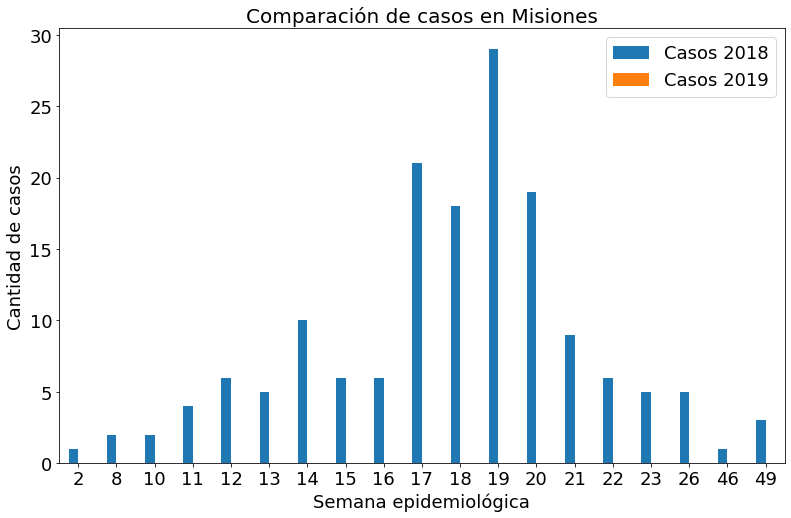

In [ ]:
df13 = df[df['provincia_nombre']=='Misiones']
ax1 = df13['cantidad_casos'].groupby(df13['semanas_epidemiologicas']).sum()

df13 = df5[df5['provincia_nombre']=='Misiones']
ax2 = df13['cantidad_casos'].groupby(df13['semanas_epidemiologicas']).sum()

df10 = pd.DataFrame({'Casos 2018': ax1,
                     'Casos 2019': ax2})
ax = df10.plot.bar(rot=0,figsize=(13,8) ,title='Comparación de casos en Misiones')
ax.title.set_size(20)
plt.rcParams.update({'font.size': 18})
ax.set_xlabel('Semana epidemiológica')
ax.set_ylabel('Cantidad de casos')

Text(0, 0.5, 'Cantidad de casos')

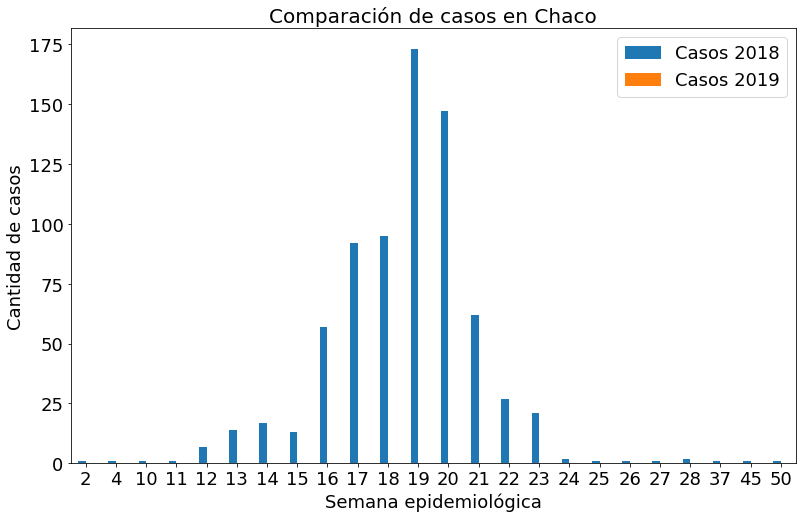

In [ ]:
df13 = df[df['provincia_nombre']=='Chaco']
ax1 = df13['cantidad_casos'].groupby(df13['semanas_epidemiologicas']).sum()

df13 = df5[df5['provincia_nombre']=='Chaco']
ax2 = df13['cantidad_casos'].groupby(df13['semanas_epidemiologicas']).sum()

df10 = pd.DataFrame({'Casos 2018': ax1,
                     'Casos 2019': ax2})
ax = df10.plot.bar(rot=0,figsize=(13,8) ,title='Comparación de casos en Chaco')
ax.title.set_size(20)
plt.rcParams.update({'font.size': 18})
ax.set_xlabel('Semana epidemiológica')
ax.set_ylabel('Cantidad de casos')

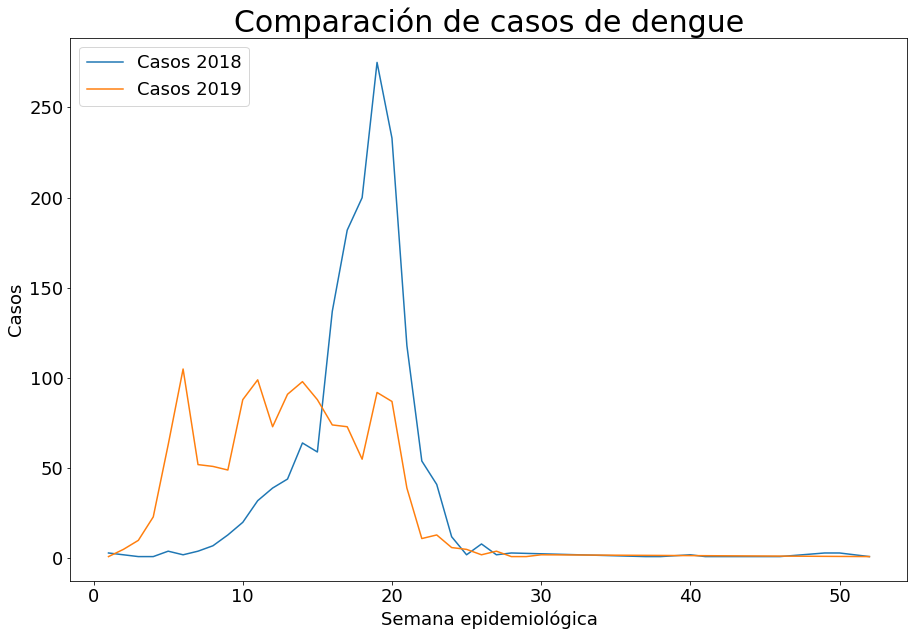

In [ ]:
casos2018 = df['cantidad_casos'].groupby(df['semanas_epidemiologicas']).sum()
casos2019 = df5['cantidad_casos'].groupby(df5['semanas_epidemiologicas']).sum()

plt.figure(figsize=(15,10))
plt.plot(casos2018, label= 'Casos 2018')
plt.plot(casos2019, label= 'Casos 2019')
plt.xlabel('Semana epidemiológica')
plt.ylabel('Casos')
plt.rcParams.update({'font.size': 18})
plt.title('Comparación de casos de dengue', fontsize= 30)
plt.legend(loc="upper left")
plt.show()

###### Casos agrupados por provincias

Text(0, 0.5, 'Cantidad de casos')

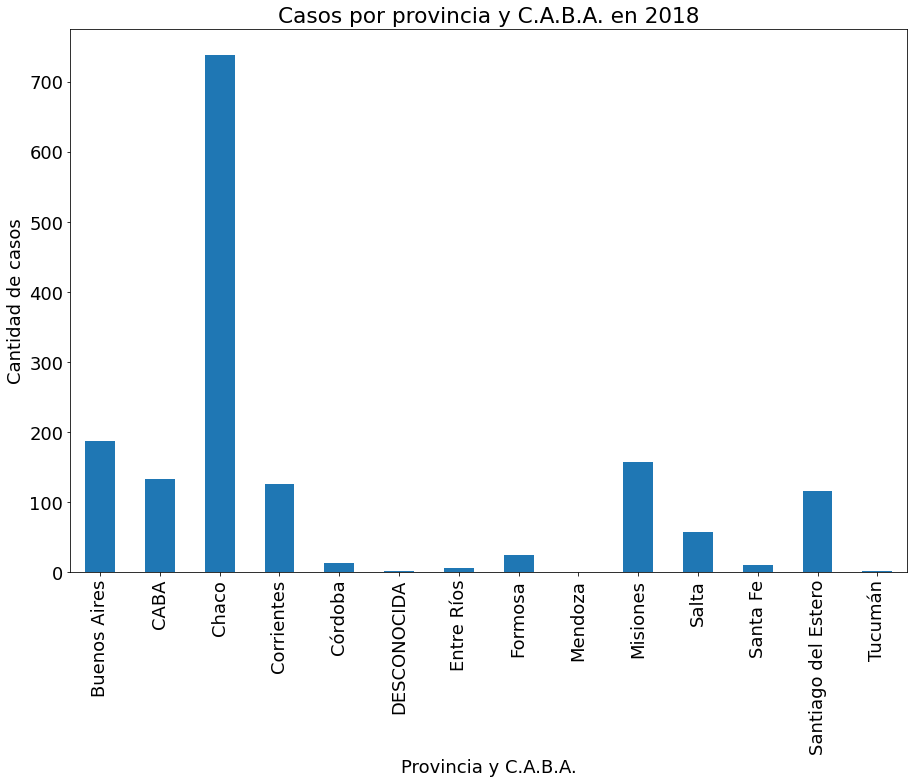

In [ ]:
ax = df['cantidad_casos'].groupby(df['provincia_nombre']).sum().plot(kind='bar', figsize=(15,10) , title='Casos por provincia y C.A.B.A. en 2018')
ax.set_xlabel('Provincia y C.A.B.A.')
ax.set_ylabel('Cantidad de casos')

Text(0, 0.5, 'Cantidad de casos')

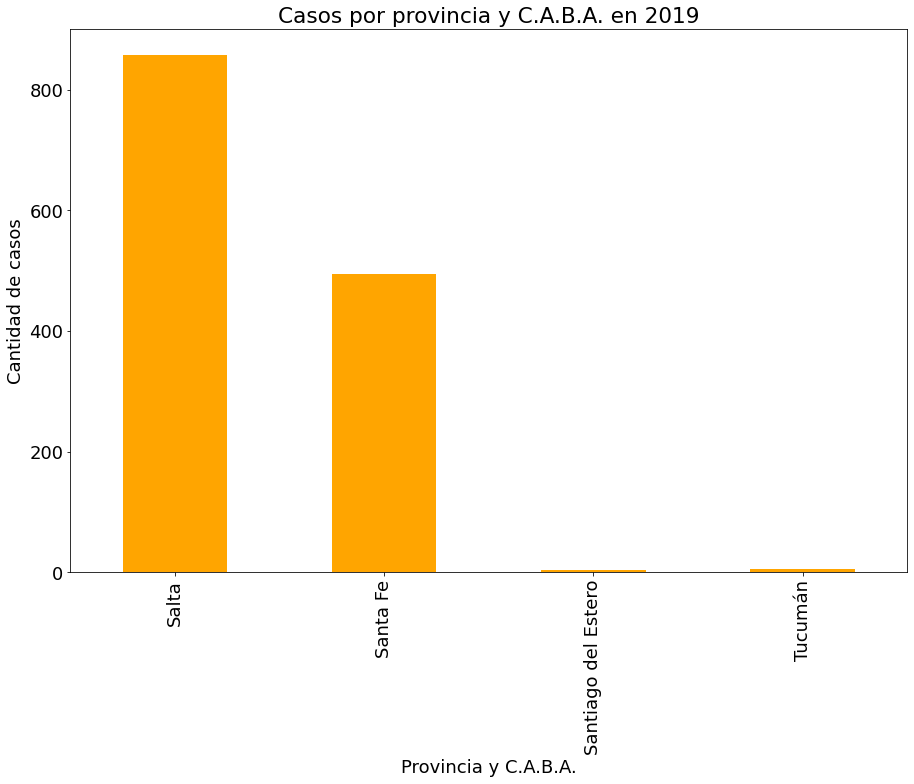

In [ ]:
ax = df5['cantidad_casos'].groupby(df5['provincia_nombre']).sum().plot(kind='bar',color='orange', figsize=(15,10) ,title='Casos por provincia y C.A.B.A. en 2019')
ax.set_xlabel('Provincia y C.A.B.A.')
ax.set_ylabel('Cantidad de casos')

Text(0, 0.5, 'Cantidad de casos')

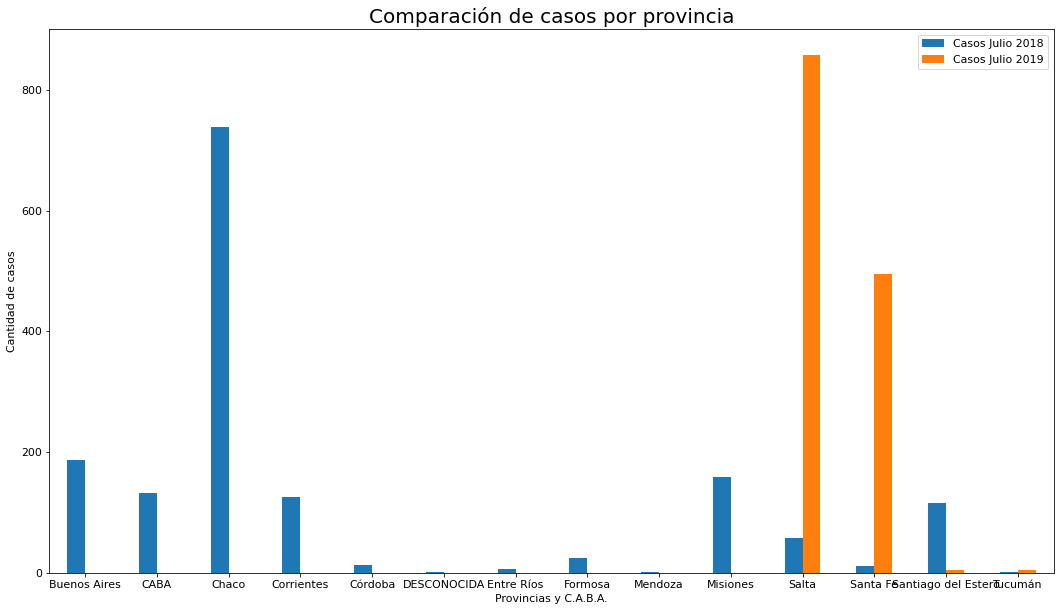

In [ ]:
#df5 = df5[df5.provincia_nombre != 'Jujuy'] # se eliminaron estas provincias para poder hacer la comparación ya que que se superponían las barras de distintas provincias
#df5 = df5[df5.provincia_nombre != 'Mendoza']

plt.rcParams.update({'font.size': 11})

casos2019 = df5['cantidad_casos'].groupby(df5['provincia_nombre']).sum()
casos2018 = df['cantidad_casos'].groupby(df['provincia_nombre']).sum()
df10 = pd.DataFrame({'Casos Julio 2018': casos2018,
                     'Casos Julio 2019': casos2019})
ax = df10.plot.bar(rot=0,figsize=(18,10) ,title='Comparación de casos por provincia')
ax.title.set_size(20)
plt.rcParams.update({'font.size': 18})
ax.set_xlabel('Provincias y C.A.B.A.')
ax.set_ylabel('Cantidad de casos')

###### Casos agrupados por municipios y comunas

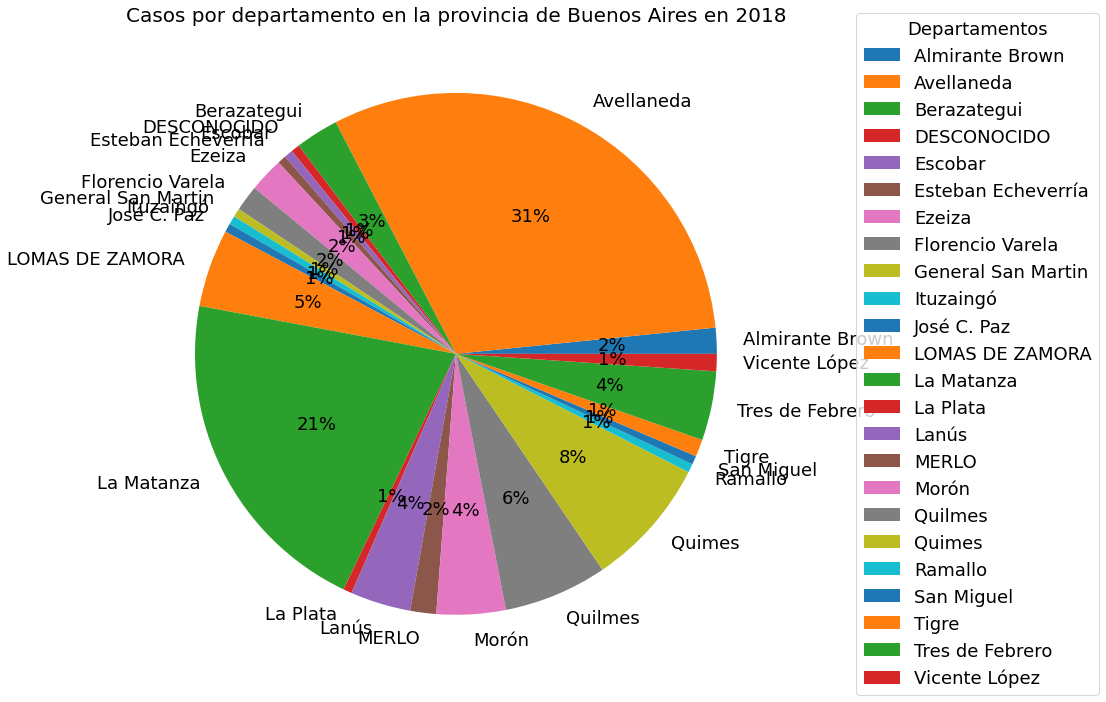

In [ ]:
df2 = df[df['provincia_nombre']=='Buenos Aires']
ax = df2['cantidad_casos'].groupby(df2['departamento_nombre']).sum().plot(kind='pie', autopct='%1.0f%%', legend='departamento_nombre', figsize=(12,12), title='Casos por departamento en la provincia de Buenos Aires en 2018')
ax.set_ylabel(' ')
ax.title.set_size(20)
ax.legend(title="Departamentos", loc="center left", bbox_to_anchor=(1.1, 0, 0.5, 1))

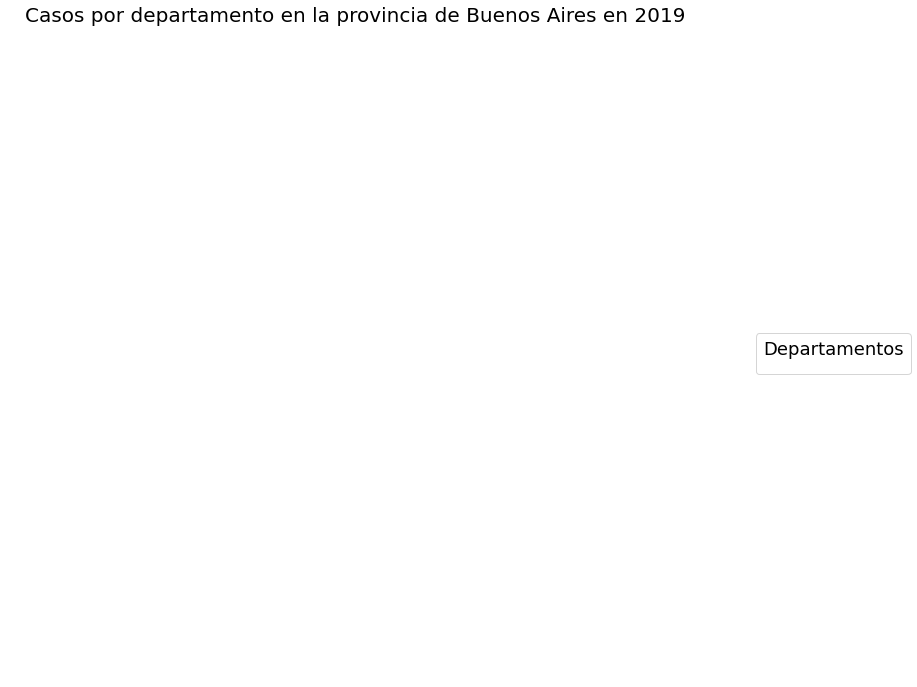

In [ ]:
df6 = df5[df5['provincia_nombre']=='Buenos Aires']
ax = df6['cantidad_casos'].groupby(df6['departamento_nombre']).sum().plot(kind='pie', figsize=(12,12), autopct='%1.0f%%', title='Casos por departamento en la provincia de Buenos Aires en 2019')
ax.set_ylabel(' ')
ax.legend([])
ax.title.set_size(20)
ax.legend(title="Departamentos", loc="center left", bbox_to_anchor=(1.1, 0, 0.5, 1))

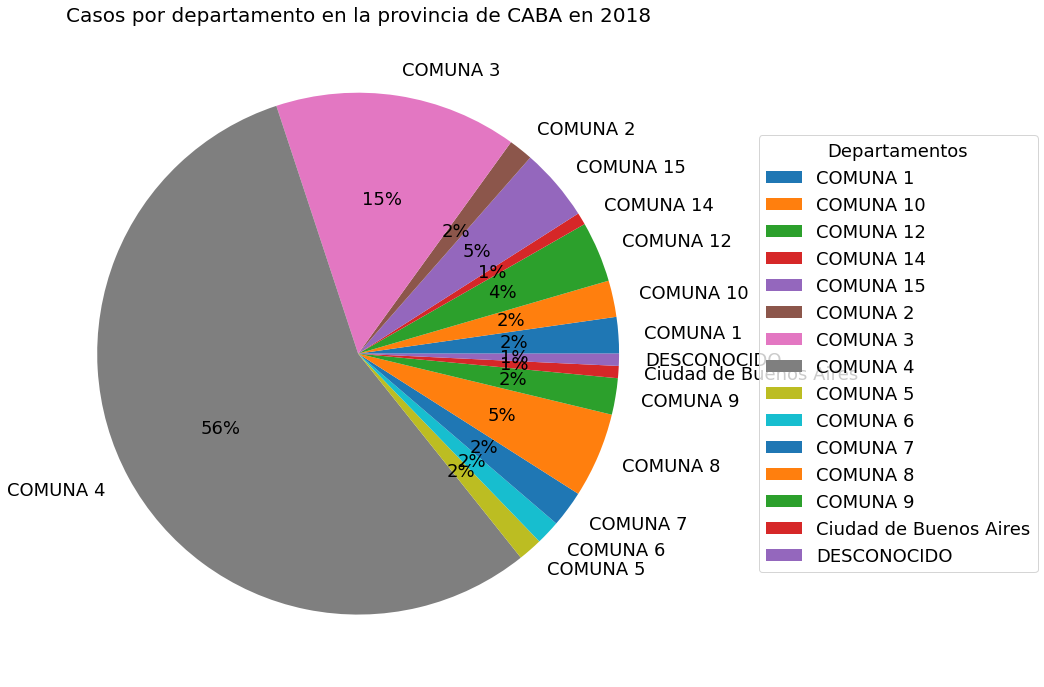

In [ ]:
df3 = df[df['provincia_nombre']=='CABA']
ax = df3['cantidad_casos'].groupby(df3['departamento_nombre']).sum().plot(kind='pie', autopct='%1.0f%%', legend='departamento_nombre', figsize=(12,12), title='Casos por departamento en la provincia de CABA en 2018')
ax.set_ylabel(' ')
ax.title.set_size(20)
ax.legend(title="Departamentos", loc="center left", bbox_to_anchor=(1.1, 0, 0.5, 1))

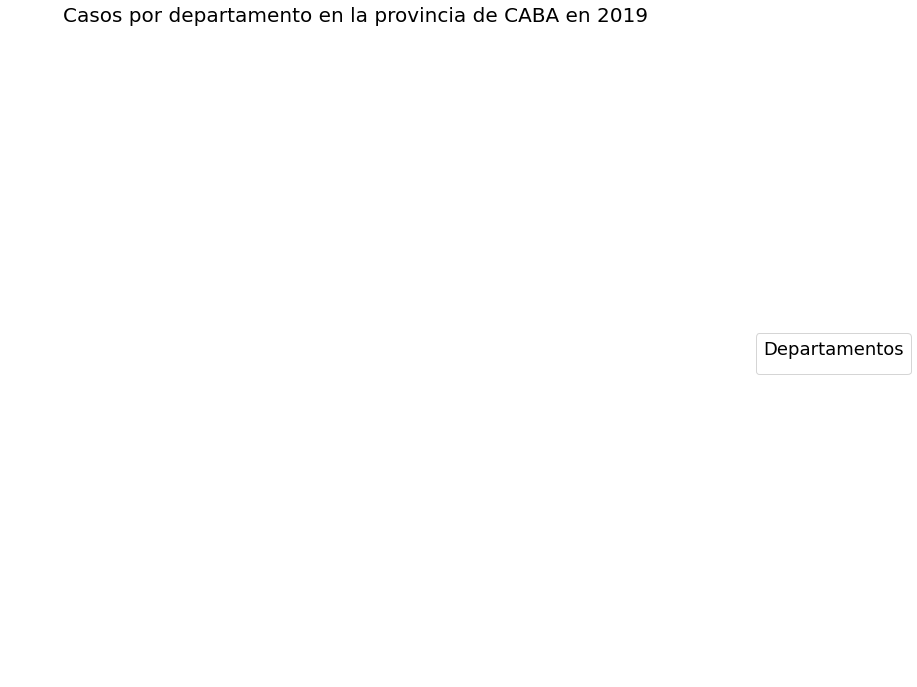

In [ ]:
df4 = df5[df5['provincia_nombre']=='CABA']
ax = df4['cantidad_casos'].groupby(df4['departamento_nombre']).sum().plot(kind='pie', autopct='%1.0f%%', legend='departamento_nombre', figsize=(12,12), title='Casos por departamento en la provincia de CABA en 2019')
ax.set_ylabel(' ')
ax.title.set_size(20)
ax.legend(title="Departamentos", loc="center left", bbox_to_anchor=(1.1, 0, 0.5, 1))

###### Casos agrupados por edades

Text(0, 0.5, 'Edades')

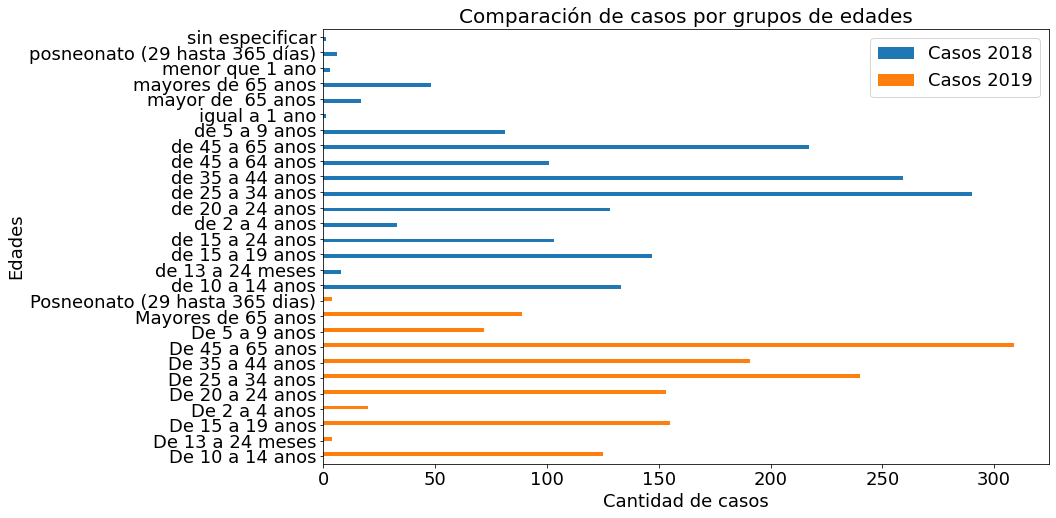

In [ ]:
# Este gráfico no suma verdaderamente los casos por edad de cada año. Se verificó contando los casos en Excel.
ax1 = df['cantidad_casos'].groupby(df['grupo_edad_desc']).sum()
ax2 = df5['cantidad_casos'].groupby(df5['grupo_edad_desc']).sum()

df10 = pd.DataFrame({'Casos 2018': ax1,
                     'Casos 2019': ax2})
ax = df10.plot.barh(rot=0,figsize=(13,8) ,title='Comparación de casos por grupos de edades')
ax.title.set_size(20)
plt.rcParams.update({'font.size': 18})
ax.set_xlabel('Cantidad de casos')
ax.set_ylabel('Edades')

#### Ajuste lineal

###### Funciones para realizar el ajuste lineal

In [ ]:
def rquared(y,y_fit):
    ss_res = np.sum((y - y_fit) ** 2) # Suma de los residuos al cuadrado
    ss_tot = np.sum((y - np.mean(y)) ** 2) # Suma Total de los cuadrados
    return 1 - (ss_res / ss_tot)     # R^2

def ajuste_lineal(x,y):
  f = lambda x, a, b: a * x + b # la función modelo, con la que se ajusta
  popt, pcov = curve_fit(f, x, y) # ajusto sin incertezas en y
  sigmas = np.sqrt([pcov[0,0],pcov[1,1]]) # las incertezas de los parametros son la raiz de la diagonal de la matriz de covarianza
  a=popt[0]
  b=popt[1]
  ea=sigmas[0]
  eb=sigmas[1]
  R = rquared(y,a*x+b)
  print('R^2 = %0.2f' % R)
  print('Pendiente: %f ± %f'% (a,ea))
  print('Ordenada al origen: %f ± %f' % (b,eb))
  return a,b,ea,eb,R

def extraigo_serie_casos(tmp):
  _cont = tmp
  _tt = _cont.index.tolist()
  _t = []
  for i in range(len(_tt)):
    _t.append(_tt[i])
  _t = np.array(_t)
  _n = _cont.to_numpy()
  return _t, _n

###### Ajuste de los casos del 2018

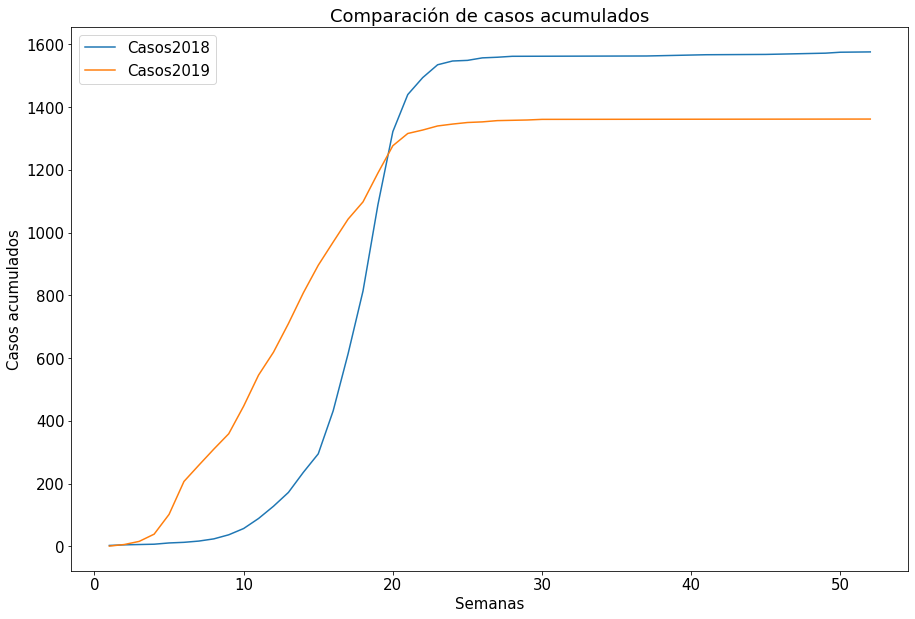

[Text(0, 0.5, 'log_10 (Casos)'), Text(0.5, 0, 'log_10(Semanas)')]

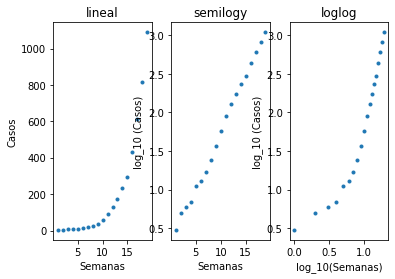

In [ ]:
semanas2018, casos2018 = extraigo_serie_casos(df['cantidad_casos'].groupby(df['semanas_epidemiologicas']).sum())
semanas2019, casos2019 = extraigo_serie_casos(df5['cantidad_casos'].groupby(df5['semanas_epidemiologicas']).sum())

plt.rcParams.update({'font.size': 15})

plt.figure(figsize=(15,10))
plt.plot(semanas2018, casos2018.cumsum())
plt.plot(semanas2019, casos2019.cumsum())
plt.xlabel('Semanas')
plt.ylabel('Casos acumulados')
plt.title('Comparación de casos acumulados')
plt.legend(['Casos2018', 'Casos2019'])
plt.show()

casos2018 = casos2018.cumsum()
casos2019 = casos2019.cumsum()

casos2018 = casos2018[semanas2018<20]
semanas2018 = semanas2018[semanas2018<20]

plt.rcParams.update({'font.size': 10})

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3)

ax1.plot(semanas2018, casos2018,'.')
ax1.set(title='lineal')
ax1.set(xlabel='Semanas', ylabel='Casos')

ax2.plot(semanas2018, np.log10(casos2018),'.')
ax2.set(title='semilogy')
ax2.set(xlabel='Semanas', ylabel='log_10 (Casos)')

ax3.plot(np.log10(semanas2018), np.log10(casos2018),'.')
ax3.set(title='loglog')
ax3.set(xlabel='log_10(Semanas)', ylabel='log_10 (Casos)')

R^2 = 1.00
Pendiente: 0.144865 ± 0.002183
Ordenada al origen: 0.309008 ± 0.024889


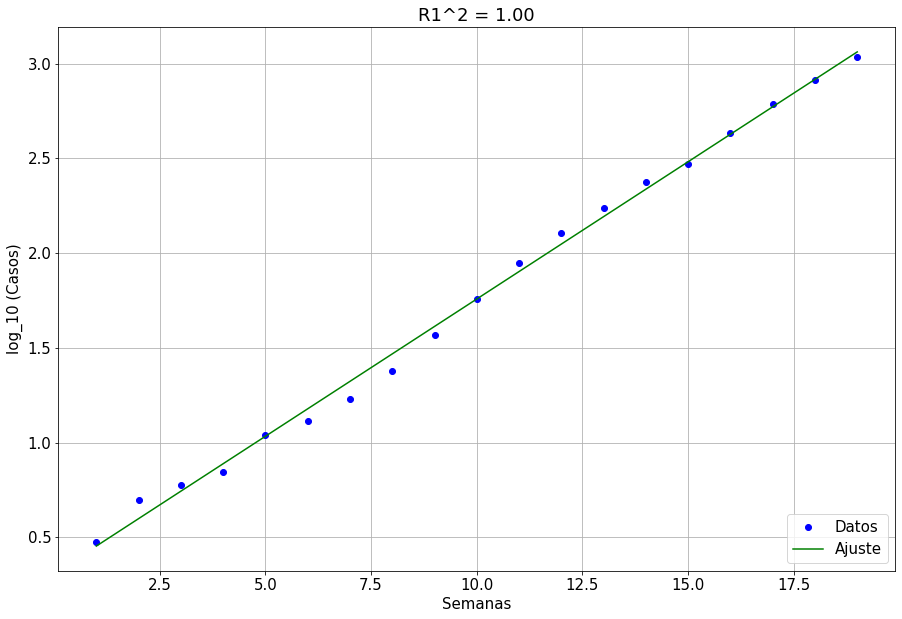

In [ ]:
x = semanas2018[semanas2018<20]
y = np.log10(casos2018[semanas2018<20])
a,b,ea,eb,R = ajuste_lineal(x,y)

plt.rcParams.update({'font.size': 15})

x = semanas2018
y = np.log10(casos2018)
plt.figure(figsize=(15,10))
plt.plot(x,y,'ob')
plt.xlabel('Semanas')
plt.ylabel('log_10 (Casos)')
plt.title('R1^2 = %0.2f' % (R))
plt.grid('on') #para que muestre la grilla

plt.plot(x,a*x+b,'g')
plt.legend(("Datos","Ajuste"), loc=4)

plt.show()

###### Ajuste de los casos del 2019

In [ ]:
# No pude hacerlo correr para el 2019, probé de varias formas y da error en la fila 8

semanas2019, casos2019 = extraigo_serie_casos(df5['cantidad_casos'].groupby(df5['semanas_epidemiologicas']).sum())

casos2019 = casos2019.cumsum()

semanas2019 = semanas2019[semanas2019<20] # Dice que hay un error acá.
casos2019 = casos2019[semanas2019<20]

plt.rcParams.update({'font.size': 10})

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1,ncols=3)

ax1.plot(semanas2019, casos2019,'.')
ax1.set(title='lineal')
ax1.set(xlabel='Semanas', ylabel='Casos')

ax2.plot(semanas2019, np.log10(casos2019),'.')
ax2.set(title='semilogy')
ax2.set(xlabel='Semanas', ylabel='log_10 (Casos)')

ax3.plot(np.log10(semanas2019), np.log10(casos2019),'.')
ax3.set(title='loglog')
ax3.set(xlabel='log_10(Semanas)', ylabel='log_10 (Casos)')

x = semanas2019[semanas2019<20]
y = np.log10(casos2019[semanas2019<20])
a1,b1,ea1,eb1,R1 = ajuste_lineal(x,y)

x = semanas2019
y = np.log10(casos2019)
plt.plot(x,y,'ob')
plt.xlabel('Semanas')
plt.ylabel('log_10(Casos)')
plt.grid('on') #para que muestre la grilla

plt.plot(x,a1*x+b1,'g')
plt.legend(("Datos","Ajuste"), loc=4)

plt.show()

IndexError: ignored